## Predictions with the Feedforward Neural Network

**Nils Marthiensen - MatNr.: 17203238 - 7. Semester CME**

Importing the necessary libraries

In [1]:
import keras
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense

Importing the model

In [2]:
ANN = load_model('models/dax_pred_model_3')

In [3]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 754
Trainable params: 754
Non-trainable params: 0
_________________________________________________________________


Importing the new data set

In [3]:
df = pd.read_csv('HistoricDAXValuesUVneuR.csv', low_memory=False, delimiter=';', encoding='latin1')

Preparing the data

In [4]:
df = df.drop(columns = {'Datum'})
df = df.drop(columns = {'Rechnung'})
df = df.drop(columns = {'ï»¿Datum-1'})

In [5]:
df['Schluss'] = df['Schluss'].str.replace('.', '').str.replace(',', '.')
df['ErÃ¶ffnung'] = df['ErÃ¶ffnung'].str.replace('.', '').str.replace(',', '.')
df['Tageshoch'] = df['Tageshoch'].str.replace('.', '').str.replace(',', '.')
df['Tagestief'] = df['Tagestief'].str.replace('.', '').str.replace(',', '.')
df['Schluss-1'] = df['Schluss-1'].str.replace('.', '').str.replace(',', '.')
df['ErÃ¶ffnung-1'] = df['ErÃ¶ffnung-1'].str.replace('.', '').str.replace(',', '.')
df['Tageshoch-1'] = df['Tageshoch-1'].str.replace('.', '').str.replace(',', '.')
df['Tagestief-1'] = df['Tagestief-1'].str.replace('.', '').str.replace(',', '.')

In [6]:
df = df.dropna(axis='rows', how='any')

In [7]:
df['Schluss-1']= df['Schluss-1'].astype(str).astype(float)
df['ErÃ¶ffnung-1']= df['ErÃ¶ffnung-1'].astype(str).astype(float)
df['Tageshoch-1']= df['Tageshoch-1'].astype(str).astype(float)
df['Tagestief-1']= df['Tagestief-1'].astype(str).astype(float)
df['Schluss']= df['Schluss'].astype(str).astype(float)
df['ErÃ¶ffnung']= df['ErÃ¶ffnung'].astype(str).astype(float)
df['Tageshoch']= df['Tageshoch'].astype(str).astype(float)
df['Tagestief']= df['Tagestief'].astype(str).astype(float)
df['Ergebnis']= df['Ergebnis'].astype(str).astype(float)

Splitting the data in X and y for classes and labels

In [8]:
df = df[['Schluss-1', 'ErÃ¶ffnung-1', 'Tageshoch-1', 'Tagestief-1', 'Schluss','ErÃ¶ffnung','Tageshoch','Tagestief','Ergebnis']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Again some more preparation

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(X)

In [11]:
y = y.reshape((-1,1))

Letting the model make actual predictions

In [12]:
predictions = ANN.predict(scaled_X, batch_size=20, verbose=0)

In [13]:
for i in predictions:
    print(i)

[0.6330588  0.36694124]
[0.63560814 0.36439186]
[0.6277326  0.37226745]
[0.62726736 0.3727327 ]
[0.6242583 0.3757417]
[0.6376044  0.36239564]
[0.5685942  0.43140578]
[0.55109876 0.4489012 ]
[0.53094345 0.46905652]
[0.49194756 0.5080524 ]
[0.47253397 0.527466  ]
[0.422357   0.57764304]
[0.46954966 0.53045034]
[0.44556838 0.5544316 ]
[0.471578   0.52842206]
[0.48353407 0.5164659 ]
[0.4394934 0.5605066]
[0.42130002 0.57869995]
[0.41797823 0.5820218 ]
[0.42168114 0.57831883]
[0.4235706  0.57642937]
[0.42838132 0.5716187 ]
[0.37700045 0.62299955]
[0.05401483 0.9459852 ]
[0.00548884 0.9945111 ]
[0.42238393 0.5776161 ]
[0.44734988 0.5526501 ]
[0.34454492 0.6554551 ]
[0.4009555 0.5990445]
[0.03148576 0.96851426]
[0.08017855 0.91982144]
[0.5010722  0.49892774]
[0.35197434 0.6480257 ]
[0.4728077 0.5271923]
[0.33244348 0.6675565 ]
[0.43756583 0.5624342 ]
[0.44078732 0.5592127 ]
[0.45082307 0.549177  ]
[0.5012289  0.49877116]
[0.41123012 0.5887699 ]
[0.44163808 0.55836195]
[0.45872235 0.5412777 ]


In [14]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [15]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1


Accuracy of the predictions

In [16]:
accuracy_score(y_true=y, y_pred=rounded_predictions)

0.5913978494623656

Visualizing the results in a confusion matrix

In [17]:
%matplotlib inline

In [18]:
cm = confusion_matrix(y_true=y, y_pred=rounded_predictions)

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt. xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[11 29]
 [ 9 44]]


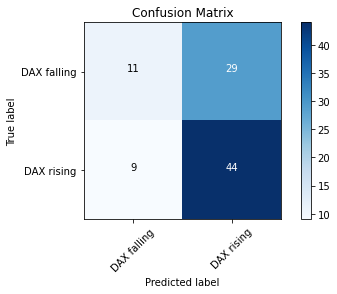

In [20]:
cm_plot_labels = ['DAX falling','DAX rising']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')